#  <center>                   EE511 Homework 4                  </center>
### <font color=green>  <center>                  Royston Marian Mascarenhas          </font> </center> 


## <center> <font color=red> DTFS MC Stationary distributions </font> </center>

### Code:

In [200]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [255]:
a = 1.0/10.0
b = 1.0/15.0
Pv1 = np.array([((1-a),a),(b,(1-b))])

In [256]:
a = 0.5
b = 0.5
Pv2 = np.array([((1-a),a),(b,(1-b))])

In [257]:
a = 1
b = 1
Pv3 = np.array([((1-a),a),(b,(1-b))])

In [258]:
a = 0
b = 0
Pv4 = np.array([((1-a),a),(b,(1-b))])

In [270]:
def find_stat(P):
    e_val,e_vec = np.linalg.eig(np.transpose(P))
    dim = np.shape(e_val)[0]
    for i in range(0,dim):
        if e_val[i] == 1:
            ind = i
    #return e_vec[:,1]
    #print(e_val)
    return (e_vec[:,ind]/np.sum(e_vec[:,ind]))

### Summary of Approach

The algorithm used here is: <br>

- Take the transpose of the transition matrix
- Find the eigen values and vectors
- Find the eigen vector corresponding to an eigen value of 1
- Normalize the eigen vector with the sum of its elements

### Results and Discussion

#### Results

In [271]:
print("The stationary distribution for a = 1/10 and b =1/15 is ")
find_stat(Pv1)

The stationary distribution for a = 1/10 and b =1/15 is 


array([0.4, 0.6])

In [272]:
print("The stationary distribution for a = 0.5 and b = 0.5 is ")
find_stat(Pv2)

The stationary distribution for a = 0.5 and b = 0.5 is 


array([0.5, 0.5])

In [273]:
print("The stationary distribution for a = 1 and b =1 is ")
find_stat(Pv3)

The stationary distribution for a = 1 and b =1 is 


array([0.5, 0.5])

In [276]:
print("The stationary distribution for a = 0 and b = 0 is ")
print(find_stat(Pv4))
print("But the result is further discussed below especially for this special 'absorbing' case")

The stationary distribution for a = 0 and b = 0 is 
[0. 1.]
But the result is further discussed below especially for this special 'absorbing' case


#### Discussion

- A stationary distribution is one which when multiplied with the transition matrix will produce a vector which is constant or saturated over several iterations of the Markov chain.
- This is only true for regular Markov chains.
- Regular Markov chains are those Markov chains which have regular matrices. A matrix is considered to be regular only if there exists positive elements for a certain power of the matrix. 
- Therefore, a stationary distribution can be said to have a probability distribution that remains unchanged as the Markov chain progresses.
- Let us discuss the various cases and verify the results.
<br>
> In the first case:

In [283]:
np.matmul(np.array([0.4, 0.6]), Pv1)

array([0.4, 0.6])

>In the second case:

In [285]:
np.matmul(np.array([0.5, 0.5]), Pv2)

array([0.5, 0.5])

> In the third case:

In [287]:
np.matmul(np.array([0.5, 0.5]), Pv3)

array([0.5, 0.5])

> In the fourth case: Absorbing case. Stationary distribution is the initial distribution.

- As we can see in all the 4 cases, the product of the stationary matrix and the transition matrix leads back to the stationary distribution. Thus, we can say that the result if verified.
- However, considering case number 4, we observe that the distribution is absorbing. An absorbing Markov chain is one in which the matrix revolves around the same state. 
- Therefore, we can see that the initial distribution is the stationary distribution. 
- The procedure involved included finding the eigen values and the eigen vectors for the transition matrix.
- The eigen vector corresponding to the eigen value of 1 is the column which is the stationary distribution 
- When there are multiple eigen vectors with eigenvalue of 1, each eigenvector is a stationary distribution.

Test for periodicity and reducibility:

- A transition matrix is said to be reducible if there exists a 0 element in the matrix. It implies that 2 states are not connected. P3 and P4 are reducible.
- Test for periodicity: If the entries on the diagonal are positive for T^^n where n > 1, then the matrix is aperiodic. 
- P2, P4 and P1 are aperiodic.

## <font color=red> <center> DTFS MC Simulations </font> </center>

### Code

In [22]:
P1 = np.array([(0,1),(1,0)])
P2 = np.array([(0.75,0.25),(0.1,0.9)])
P3 = np.array([(0.48,0.48,0.04),(0.22,0.7,0.08),(0,0,1)])

In [202]:
def get_state(vec,rand):
    check = []
    #print(rand)
    length = np.shape(vec)[0]
    for ele in vec:
        check.append(ele-rand)
    for i in range(0,length):
        if (check[i]<0):
            check[i] = 2
    result = np.argmin(np.array(check))
    if (rand>np.max(np.array(vec))):
        result = np.argmax(np.array(vec))
    #print(result)
    return result

In [203]:
def get_path(init_vec,P):
    n = 500
    state_list = []
    #init_vec = np.array([1,0])
    statmat_stack = np.zeros((n+1,np.shape(init_vec)[0]))
    statmat_stack[0,:] = init_vec
    for t in range(0,n):
        statmat_stack[t+1] = np.matmul(statmat_stack[t],P)
        cand = np.random.uniform(0,1)
        state_list.append(get_state(statmat_stack[t+1],cand))
    #print(len(state_list))
    return state_list

### Summary of Approach

The algorithm used here is <br>
    - Multiply the initial vector with the transition matrix
    - Compare the ranges of the elements of the resulting vector to a random number from a uniform distribution
    - Assign a state to the vector obtained
    - Multiply the new state vector with the transition matrix to get the next state vector
    - Repeat the above two steps until desired number of iterations
    - Repeat the above process 75 times

### Results and Discussion

### Results

### For P1 : Sample paths and ergodicity test

In [212]:
state_stack1 = np.zeros((75,500))
init_vec = np.array([1,0])
for x in tqdm(range(0,75)):
    state_stack1[x,:] = get_path(init_vec,P1)

In [213]:
state_stack1

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

(array([75.,  0.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

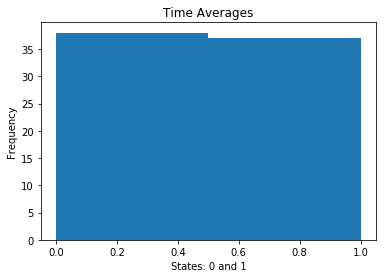

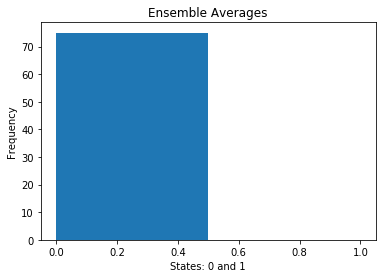

In [226]:
#time_average
#75 x 500 matrix is 75 paths of 500 states each
plt.figure(1)
plt.title("Time Averages")
plt.xlabel("States: 0 and 1")
plt.ylabel("Frequency")
plt.hist(state_stack1[0,500-75:],range=(0,1),bins=2)
#ensemble averages
plt.figure(2)
plt.title("Ensemble Averages")
plt.xlabel("States: 0 and 1")
plt.ylabel("Frequency")
plt.hist(state_stack1[:,-1],range=(0,1),bins=2)
#see if they are the same visually 


### For P2: sample paths and ergodicity test

In [214]:
state_stack2 = np.zeros((75,500))
init_vec = np.array([1,0])
for x in tqdm(range(0,75)):
    state_stack2[x,:] = get_path(init_vec,P2)

In [215]:
state_stack2

array([[1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

(array([17., 58.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

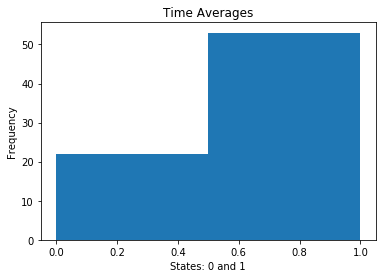

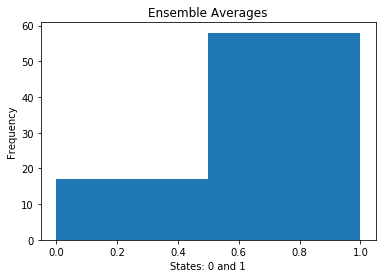

In [227]:
#time_average
#75 x 500 matrix is 75 paths of 500 states each
plt.figure(1)
plt.title("Time Averages")
plt.xlabel("States: 0 and 1")
plt.ylabel("Frequency")
plt.hist(state_stack2[0,500-75:],range=(0,1),bins=2)
#ensemble averages
plt.figure(2)
plt.title("Ensemble Averages")
plt.xlabel("States: 0 and 1")
plt.ylabel("Frequency")
plt.hist(state_stack2[:,-1],range=(0,1),bins=2)
#see if they are the same visually 


### For P3: sample paths and ergodicity test

In [216]:
state_stack3 = np.zeros((75,500))
init_vec = np.array([1,0,0])
for x in range(0,75):
    state_stack3[x,:] = get_path(init_vec,P3)

In [218]:
state_stack3

array([[0., 1., 1., ..., 2., 2., 2.],
       [0., 1., 1., ..., 2., 2., 2.],
       [0., 1., 1., ..., 2., 2., 2.],
       ...,
       [0., 2., 1., ..., 2., 2., 2.],
       [0., 1., 1., ..., 2., 2., 2.],
       [0., 1., 2., ..., 2., 2., 2.]])

(array([ 0.,  0., 75.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

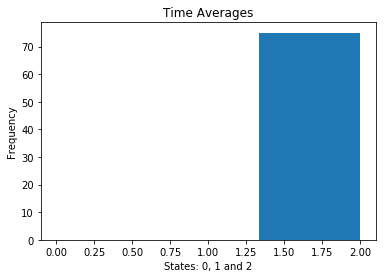

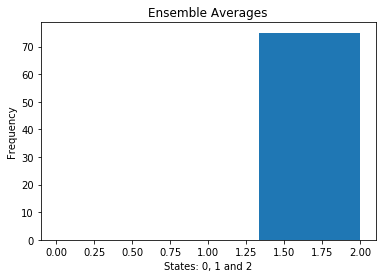

In [268]:
#time_average
#75 x 500 matrix is 75 paths of 500 states each
plt.figure(1)
plt.title("Time Averages")
plt.xlabel("States: 0, 1 and 2")
plt.ylabel("Frequency")
plt.hist(state_stack3[0,500-75:],range=(0,2),bins=3)
#ensemble averages
plt.figure(2)
plt.title("Ensemble Averages")
plt.xlabel("States: 0, 1 and 2")
plt.ylabel("Frequency")
plt.hist(state_stack3[:,-1],range=(0,2),bins=3)
#see if they are the same visually 


#### Testing for convergence (Order: P1, P2, P3)

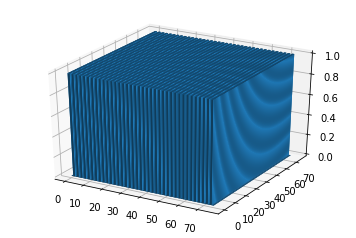

In [326]:
data1 = state_stack1[:,500-75:]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid( np.arange(np.shape(data1)[1]),
                              np.arange(np.shape(data1)[0]) )
x = x.flatten()
y = y.flatten()
z = data1.flatten()
ax.bar3d( x,
          y,
          np.zeros(len(z)),
          1, 1, z)
plt.show()



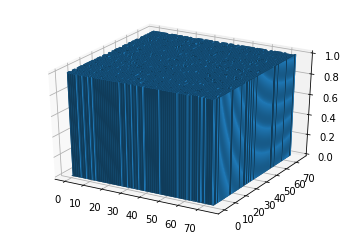

In [316]:
data1 = state_stack2[:,500-75:]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid( np.arange(np.shape(data1)[1]),
                              np.arange(np.shape(data1)[0]) )
x = x.flatten()
y = y.flatten()
z = data1.flatten()

hist, xedges, yedges = np.histogram2d(x, y) 

ax.bar3d( x,
          y,
          np.zeros(len(z)),
          1, 1, z)
plt.show()

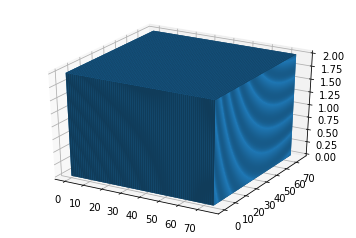

In [315]:
data1 = state_stack3[:,500-75:]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid( np.arange(np.shape(data1)[1]),
                              np.arange(np.shape(data1)[0]) )

x = x.flatten()
y = y.flatten()
z = data1.flatten()
hist, xedges, yedges = np.histogram2d(x, y) 
ax.bar3d( x,
          y,
          np.zeros(len(z)),
          1, 1, z)
plt.show()



### Discussion:

> The only ergodic chain is that associated to P2 <br>
- We observe that for P2, the time averages and the ensemble averages are the same. <br>
- Also, to check whether P2 is truly ergodic and not erratically so because of absorbing property, we see the test for convergence and here, we observe that there is a gradual transition from one state to the other as the markov chain progresses

> Chains P1 and P3 are non ergodic <br>
- The non ergodicity for P1 is lack of similarity between the time averages and the ensemble averages. <br>
- On first glance, we might conclude that P3 is ergodic but from the test for convergence, we observe that there is an inconsistency in the convergence test: that the convergence is not gradual. <br>
- This leads us to believe that the Markov chain is indeed absorbing and thus non ergodic<br>

> Test for convergence: <br>
- P1 Markov chain does not converge. We can observe from the graph for convergence, the stripes of shifting states after each iteration - that one constant value is not met and that there is no limiting distribution and therefore, there is no convergence.<br>
- P2 Markov chain converges eventually. We can observe from the test for ergodicity that P2 is truly ergodic and not erratically so because of absorbing property- we see the test for convergence and here, we observe that there is a gradual transition from one state to the other as the markov chain progresses <br>
- P3 converges but NOT in the sense of the word- it is absorbing and favors one state only. P3 converges but we can see from the convergence graph that it is constantly biased towards one state. On first glance, we might conclude that P3 is ergodic but from the test for convergence, we observe that there is an inconsistency in the convergence test: that the convergence is not gradual. Therefore, it does not truly converge <br>

> Reducibility and Periodicity: <br>
- A transition matrix is said to be reducible if there exists a 0 element in the matrix. It implies that 2 states are not connected.
- P1 and P3 are reducible. P2 is irreducible.
- Test for periodicity: If the entries on the diagonal are positive for T^^n where n > 1, then the matrix is aperiodic. 
- P1 and P3 are periodic. P2 is not periodic

- The state stack of each Markov chain define the states of the Markov chain at each iteration.
- Horizonatally, we can see the sample path of all iterations (75 sample paths)
- Vertically, we can see each iteration of one particular sample path (500 iterations)
- We can observe from each sample path, the frequency of the states assigned
- The histograms are used to visualize the states assigned
- Since the last phase of the Markov chain is the convergent phase, the samples are visualized from there.
- The histogram tells us whether the time averages and the ensemble averages look the same.
- If they do look the same, then the markov chain is ergodic
- For an ergodic Markov chain, 1 is a permanent eigen value. If all other eigenvalues are positive and less than 1, then the Markov chain is ergodic.
- Such properties as advantageous since the time averages and the space averages are the same and the behavior can be easily predicted.

### References:
Referred https://stackoverflow.com/questions/14061061/how-can-i-render-3d-histograms-in-python for plotting 3D plot of 2D data in test for convergence.